# Linear Regression Migraine Prediction

This notebook demonstrates migraine prediction using a linear regression model, following a similar structure to the LSTM notebook.

## 1. Import Required Libraries
Import libraries for data handling, model building, and visualization.

In [3]:
import sys
import os
sys.path.append(os.path.abspath(os.path.join(os.getcwd(), '..')))

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import MinMaxScaler

## 2. Load and Prepare Dataset
Load the dataset and preprocess it (handle missing values, normalization, etc.).

In [4]:
from prediction.data_processing import merge_migraine_and_weather_data, process_combined_data

# Merge and process data
merge_migraine_and_weather_data()
data = process_combined_data()

data = data[data['Pain Level'] > 0].reset_index(drop=True)

# Drop columns with any NaN values (except the target column)
data = data.dropna(axis=1)

# Select features and target
feature_cols = data.drop(columns=[
    'Date', 'date', 'Medication', 'Dosage', 'Triggers', 'Notes', 'Location', 'Timezone',
    'Pain Level', 'Pain_Level_Binary', 'Pain_Level_Log',
    'Longitude', 'Latitude', 'Time',
    'Latitude_x', 'Longitude_x', 'Latitude_y', 'Longitude_y',
], errors='ignore').columns

data = data.dropna(subset=['Pain Level'])

features = data[feature_cols].values
target = data['Pain Level'].values

# Normalize features
scaler = MinMaxScaler()
features_scaled = scaler.fit_transform(features)

print(f"Features shape: {features_scaled.shape}")
print(f"Target shape: {target.shape}")

Features shape: (342, 38)
Target shape: (342,)


## 3. Split Data into Training and Test Sets
Use scikit-learn's train_test_split to divide the dataset.

In [5]:
X_train, X_test, y_train, y_test = train_test_split(features_scaled, target, test_size=0.2, random_state=42)
print(f"Train shape: {X_train.shape}, Test shape: {X_test.shape}")

Train shape: (273, 38), Test shape: (69, 38)


## 4. Build Linear Regression Model
Instantiate a LinearRegression model from scikit-learn.

In [6]:
model = LinearRegression()
model

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


## 5. Train the Model
Fit the linear regression model to the training data.

In [7]:
model.fit(X_train, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


## 6. Evaluate Model Performance
Evaluate the model using metrics such as mean squared error (MSE) and R^2 score on the test set.

In [8]:
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Mean Squared Error (MSE): {mse}")
print(f"R^2 Score: {r2}")

Mean Squared Error (MSE): 2.5231577634965
R^2 Score: -0.16975063167698878


## 7. Make Predictions and Visualize Results
Use the trained model to make predictions on the test set and visualize the results.

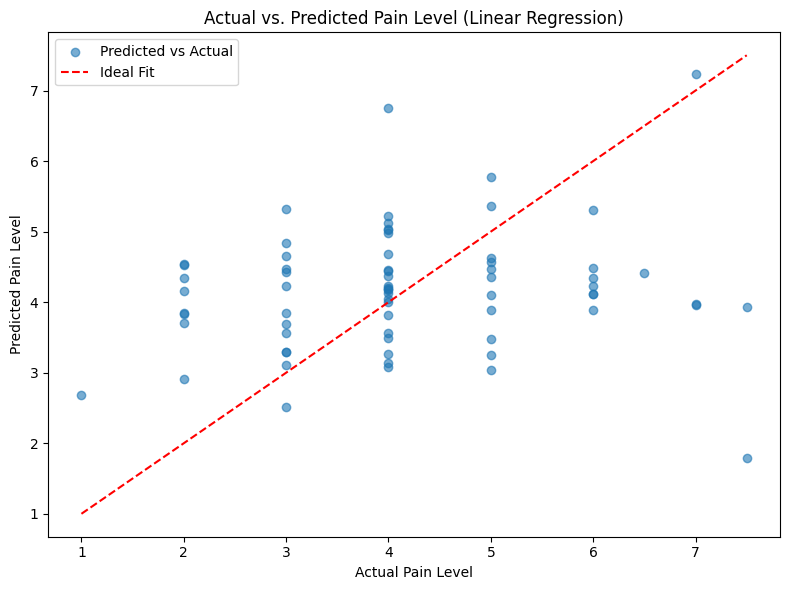

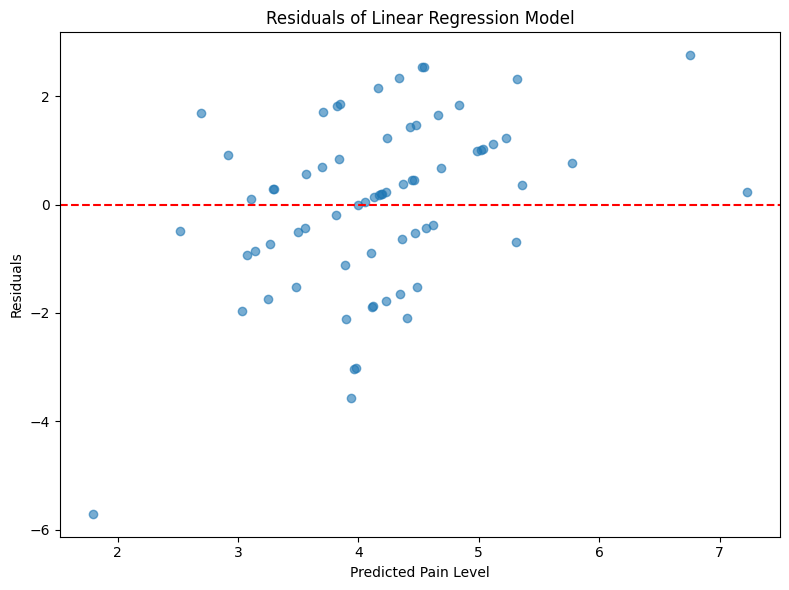

In [9]:
plt.figure(figsize=(8,6))
plt.scatter(y_test, y_pred, alpha=0.6, label='Predicted vs Actual')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', label='Ideal Fit')
plt.xlabel('Actual Pain Level')
plt.ylabel('Predicted Pain Level')
plt.title('Actual vs. Predicted Pain Level (Linear Regression)')
plt.legend()
plt.tight_layout()
plt.show()

# Residual plot
plt.figure(figsize=(8,6))
residuals = y_pred - y_test
plt.scatter(y_pred, residuals, alpha=0.6)
plt.axhline(0, color='r', linestyle='--')
plt.xlabel('Predicted Pain Level')
plt.ylabel('Residuals')
plt.title('Residuals of Linear Regression Model')
plt.tight_layout()
plt.show()